In [3]:
import numpy as np

In [4]:
# Calculates SEFD for BHEX Mini

def SEFD(eta_A, T_sys, A):
    k = 1.38e-23  # Boltzmann constant in J/K
    sefd_w = (2 * k * T_sys) / (eta_A * A)  # W m^-2 Hz^-1
    sefd_jy = sefd_w / 1e-26  # convert to Jy
    return sefd_jy

SEFD(0.85, 30, np.pi*(2.5/2)**2)
SEFD(0.85, 60, np.pi*(2.5/2)**2)
SEFD(0.85, 90, np.pi*(2.5/2)**2)

59533.685254063894

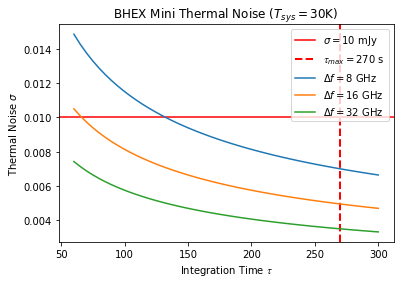

In [5]:
# Calculates Minimum Integration Time for BHEX Mini

import numpy as np
import matplotlib.pyplot as plt

"""
Variable Definitions:
  SEFD1: Space Telescope Sensitivity (Jy)
  SEFD2: Ground Telescope Sensitivity (Jy)
  freqBandwidth: Frequency Bandwidth (GHz)
  etaQ: Quantization Efficiency (Unitless)
  thermalNoise: Thermal Noise of BHEX Mini (mJy)
"""

def minIntegrationTime(SEFD1, SEFD2, freqBandwidth, etaQ, thermalNoise):

  frac1 = (SEFD1 * SEFD2) / (2 * freqBandwidth)
  frac2 = 1 / (etaQ * thermalNoise) ** 2

  min_tau = frac1 * frac2

  return min_tau

def thermalNoise(SEFD1, SEFD2, freqBandwidth, etaQ, intTime):

  noise = (1/etaQ) * np.sqrt((SEFD1 * SEFD2)/(2*freqBandwidth*intTime))

  return noise

x = np.linspace(60, 300, 50)

BHEXMini_SEFD_30K = 19844.56175135463

thermalNoise_values_8GHz = []
thermalNoise_values_16GHz = []
thermalNoise_values_32GHz = []

plt.axhline(y=10e-3, color='r', linestyle='-', label = "$\sigma = 10$ mJy")
plt.axvline(x=270, color='r', linestyle='--', linewidth=2, label = "$𝜏_{max} = 270$ s")

for i in x:
  thermalNoise_values_8GHz.append(thermalNoise(BHEXMini_SEFD_30K, 6000, 8e9, 0.75, i))
  thermalNoise_values_16GHz.append(thermalNoise(BHEXMini_SEFD_30K, 6000, 16e9, 0.75, i))
  thermalNoise_values_32GHz.append(thermalNoise(BHEXMini_SEFD_30K, 6000, 32e9, 0.75, i))

plt.plot(x, thermalNoise_values_8GHz, label = "$\Delta f = 8$ GHz")
plt.plot(x, thermalNoise_values_16GHz, label = "$\Delta f = 16$ GHz")
plt.plot(x, thermalNoise_values_32GHz, label = "$\Delta f = 32$ GHz")

plt.title("BHEX Mini Thermal Noise ($T_{sys} = 30$K)")
plt.legend(loc = "upper right")

plt.ylabel("Thermal Noise $\sigma$")
plt.xlabel("Integration Time $𝜏$")
plt.savefig('ThermalNoise30K.png', dpi=300, bbox_inches='tight')

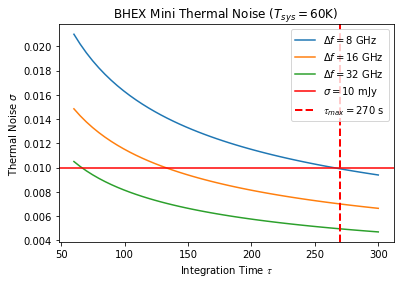

In [6]:
x2 = np.linspace(60, 300, 50)

BHEXMini_SEFD_60K = 39689.12350270926

thermalNoise_values_8GHz_60K = []
thermalNoise_values_16GHz_60K = []
thermalNoise_values_32GHz_60K = []

for i in x:
  thermalNoise_values_8GHz_60K.append(thermalNoise(BHEXMini_SEFD_60K, 6000, 8e9, 0.75, i))
  thermalNoise_values_16GHz_60K.append(thermalNoise(BHEXMini_SEFD_60K, 6000, 16e9, 0.75, i))
  thermalNoise_values_32GHz_60K.append(thermalNoise(BHEXMini_SEFD_60K, 6000, 32e9, 0.75, i))

plt.plot(x2, thermalNoise_values_8GHz_60K, label = "$\Delta f = 8$ GHz")
plt.plot(x2, thermalNoise_values_16GHz_60K, label = "$\Delta f = 16$ GHz")
plt.plot(x2, thermalNoise_values_32GHz_60K, label = "$\Delta f = 32$ GHz")

plt.axhline(y=10e-3, color='r', linestyle='-', label = "$\sigma = 10$ mJy")
plt.axvline(x=270, color='r', linestyle='--', linewidth=2, label = "$𝜏_{max} = 270$ s")

plt.title("BHEX Mini Thermal Noise ($T_{sys} = 60$K)")
plt.legend(loc = "upper right")

plt.ylabel("Thermal Noise $\sigma$")
plt.xlabel("Integration Time $𝜏$")
plt.savefig('ThermalNoise60K.png', dpi=300, bbox_inches='tight')

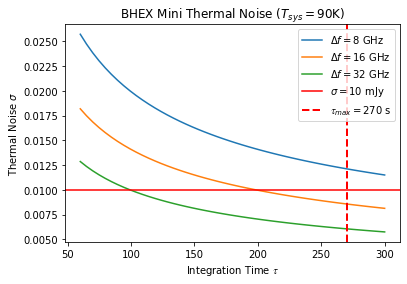

In [7]:
x3 = np.linspace(60, 300, 50)

BHEXMini_SEFD_90K = 59533.685254063894

thermalNoise_values_8GHz_90K = []
thermalNoise_values_16GHz_90K = []
thermalNoise_values_32GHz_90K = []

for i in x:
  thermalNoise_values_8GHz_90K.append(thermalNoise(BHEXMini_SEFD_90K, 6000, 8e9, 0.75, i))
  thermalNoise_values_16GHz_90K.append(thermalNoise(BHEXMini_SEFD_90K, 6000, 16e9, 0.75, i))
  thermalNoise_values_32GHz_90K.append(thermalNoise(BHEXMini_SEFD_90K, 6000, 32e9, 0.75, i))

plt.plot(x3, thermalNoise_values_8GHz_90K, label = "$\Delta f = 8$ GHz")
plt.plot(x3, thermalNoise_values_16GHz_90K, label = "$\Delta f = 16$ GHz")
plt.plot(x3, thermalNoise_values_32GHz_90K, label = "$\Delta f = 32$ GHz")

plt.axhline(y=10e-3, color='r', linestyle='-', label = "$\sigma = 10$ mJy")
plt.axvline(x=270, color='r', linestyle='--', linewidth=2, label = "$𝜏_{max} = 270$ s")

plt.title("BHEX Mini Thermal Noise ($T_{sys} = 90$K)")
plt.legend(loc = "upper right")

plt.ylabel("Thermal Noise $\sigma$")
plt.xlabel("Integration Time $𝜏$")
plt.savefig('ThermalNoise90K.png', dpi=300, bbox_inches='tight')